In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
from joblib import dump
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.datasets import load_diabetes
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [11]:
df = pd.read_csv('./datasets/titanic.csv')

le = LabelEncoder()

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

data = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis =1, inplace=True)

Y = df['Survived']
X = df.drop('Survived', axis = 1)

Train = df.drop(['Survived'], axis=1)
Test = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

LRmodel = LogisticRegression(solver='liblinear', max_iter=200)
LRmodel.fit(x_train, y_train)

y_pred = LRmodel.predict(x_test)

accuracy = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test)

print('Logistic regression accuracy: {:.2f}%'.format(accuracy * 100))
print('Logistic regression precision: {:.2f}%'.format(precision * 100))

Logistic regression accuracy: 100.00%
Logistic regression precision: 100.00%


{'C': 10, 'epsilon': 0.3, 'kernel': 'rbf', 'tol': 0.1}


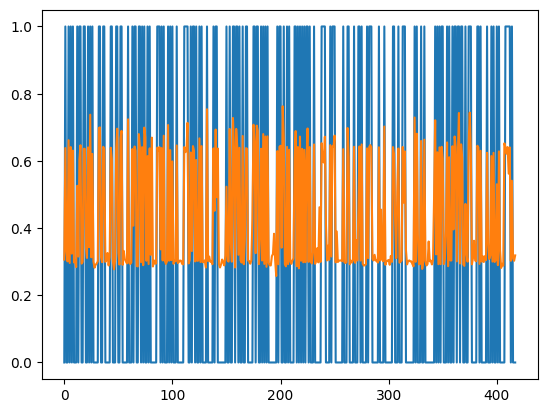

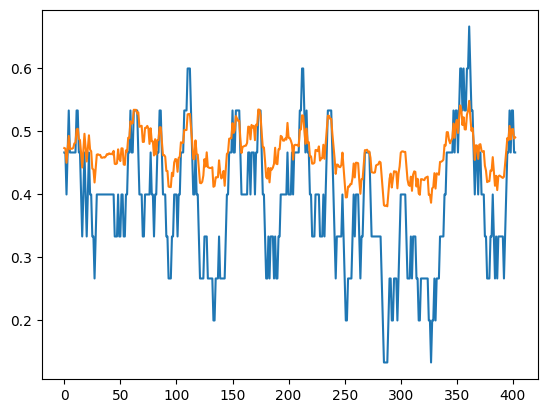

In [14]:
df = pd.read_csv('./datasets/titanic.csv')

le = LabelEncoder()

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

data = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis =1, inplace=True)

Y = df['Survived']
X = df.drop('Survived', axis = 1)

Train = df.drop(['Survived'], axis=1)
Test = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

SVRmodel = GridSearchCV(SVR(),
    {
        'kernel': ['poly', 'rbf', 'sigmoid'],
        'C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 7, 8, 9, 10],
        'tol': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 3, 4, 5],
        'epsilon': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    },
    n_jobs = 8
)

SVRmodel.fit(x_train, y_train)
print(SVRmodel.best_params_)

model = SVRmodel.best_estimator_

model.fit(x_train, y_train)

dump(model, 'model.pkl')

Ypred = model.predict(X)

plt.plot(Y)
plt.plot(Ypred)
plt.show()

wR = []
wP = []

Ymm = []
Ypmm = []

for i in range(len(Y)):
    wR.append(Y[i])
    wP.append(Ypred[i])
    
    if len(wR) > 15:
        Ymm.append(sum(wR) / 15)
        Ypmm.append(sum(wP) / 15)
        
        wR.pop(0)
        wP.pop(0)
            
plt.plot(Ymm)
plt.plot(Ypmm)
plt.show()

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1}


C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2340 fits failed out of a total of 4140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
  

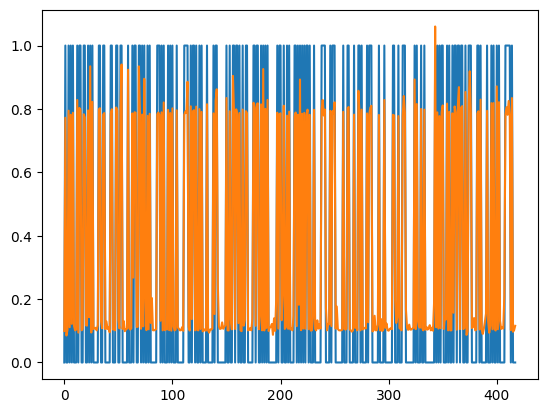

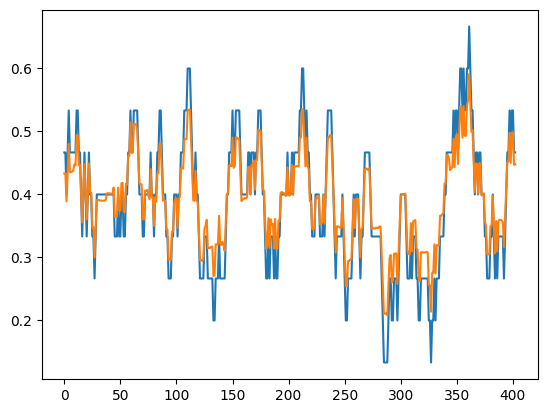

In [17]:
df = pd.read_csv('./datasets/titanic.csv')

le = LabelEncoder()

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

data = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis =1, inplace=True)

Y = df['Survived']
X = df.drop('Survived', axis = 1)

Train = df.drop(['Survived'], axis=1)
Test = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

scores = cross_val_score(ElasticNet(fit_intercept = True), X, Y, cv = 8)

ELmodel = GridSearchCV(ElasticNet(fit_intercept = True),
    {
        'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 7, 8, 9, 10],
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 3, 4, 5],
        'fit_intercept': [True, False],
    },
    n_jobs = 4
)

ELmodel.fit(x_train, y_train)
print(ELmodel.best_params_)

model = ELmodel.best_estimator_

dump(model, 'model.pkl')

Ypred = model.predict(X)

plt.plot(Y)
plt.plot(Ypred)
plt.show()

wR = []
wP = []

Ymm = []
Ypmm = []

for i in range(len(Y)):
    wR.append(Y[i])
    wP.append(Ypred[i])
    
    if len(wR) > 15:
        Ymm.append(sum(wR) / 15)
        Ypmm.append(sum(wP) / 15)
        
        wR.pop(0)
        wP.pop(0)
            
plt.plot(Ymm)
plt.plot(Ypmm)
plt.show()


C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18900 fits failed out of a total of 64800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1}


C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  2.12816584e-02
 -4.67503350e-04  4.66084094e-02]
  warnings.warn(


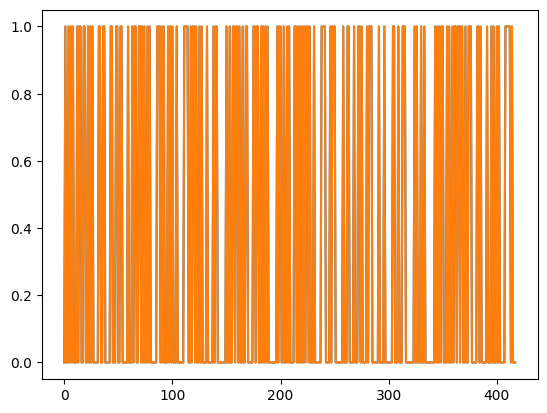

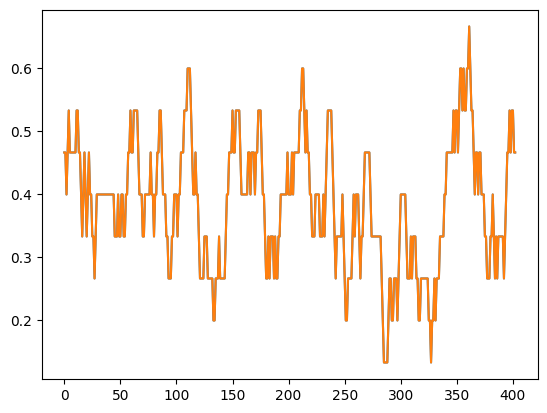

In [20]:
df = pd.read_csv('./datasets/titanic.csv')

le = LabelEncoder()

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

data = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis =1, inplace=True)

Y = df['Survived']
X = df.drop('Survived', axis = 1)

Train = df.drop(['Survived'], axis=1)
Test = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

DTRmodel = GridSearchCV(DecisionTreeRegressor(),
    {
        'criterion' : ['squared_error', 'friedman_mse', 'absolute_error ', 'poisson'],
        'splitter': ['best', 'random'],
        'max_depth': [10, 20, 30, 40, 50],
        'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 7, 8, 9, 10],
        'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 7, 8, 9, 10],
    },
    n_jobs = 8
)

DTRmodel.fit(x_train, y_train)
print(ELmodel.best_params_)

model = DTRmodel.best_estimator_

dump(model, 'model.pkl')

Ypred = model.predict(X)

plt.plot(Y)
plt.plot(Ypred)
plt.show()

wR = []
wP = []

Ymm = []
Ypmm = []

for i in range(len(Y)):
    wR.append(Y[i])
    wP.append(Ypred[i])
    
    if len(wR) > 15:
        Ymm.append(sum(wR) / 15)
        Ypmm.append(sum(wP) / 15)
        
        wR.pop(0)
        wP.pop(0)
            
plt.plot(Ymm)
plt.plot(Ypmm)
plt.show()
